In [46]:
using Pkg
Pkg.activate("/home/fedflorio/master_thesis")

  Activating project at `~/master_thesis`


In [47]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, IndexedGraphs, SparseArrays
using Random, Statistics
using Plots, LaTeXStrings
using ProgressMeter; ProgressMeter.ijulia_behavior(:clear)
using JLD2;

In [48]:
T = 10
N = 5
k = 2
maxJ = 5
K = 2*maxJ + 1
seed = 0
separation = 2
nsnaps = 4

rng = MersenneTwister(seed)
A = [0 1 1 0 1;
     1 0 0 1 0;
     1 0 0 1 0;
     0 1 1 0 1;
     1 0 0 1 0]
A = sparse(A)
# gg = random_regular_graph(N, k; seed)
# gg = prufer_decode(rand(rng, 1:N, N-2))
# gg = path_graph(N)

# A = adjacency_matrix(gg)
rand!(rng, A.nzval, (-maxJ:maxJ))  # fill directed incidence matrix with rand(-1,1)
g = IndexedBiDiGraph(gg)
β = 0.2
h = 0.5

w = [fill(MatrixProductBP.Models.IntegerGlauberFactor([A[j,i] for j in inneighbors(g,i)], h, β), T+1) for i in vertices(g)]
# w = [fill(GenericGlauberFactor([A[j,i] for j in inneighbors(g,i)]*J, h, β), T+1) for i in vertices(g)]
bp = mpbp(g, w, fill(2,N), T);

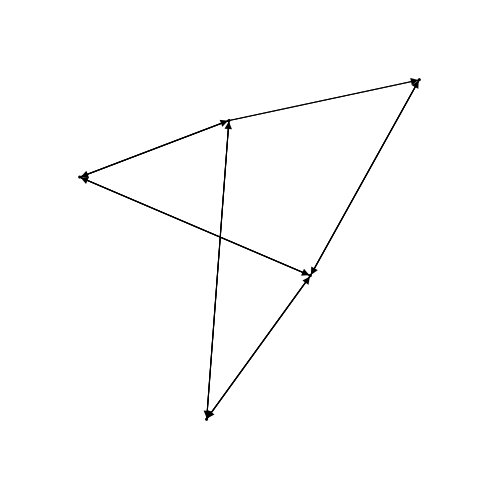

In [49]:
using GraphRecipes
graphplot(SimpleDiGraph(A), curves=false, size=(500,500), nodeshape=:circle,
    nodecolor=:black, nodesize=0.01, arrow=arrow(:closed, 0.1))

In [50]:
obs_times = collect(range(separation, step=separation, length=nsnaps))
nobs = floor(Int, N * length(obs_times) * 1.0)
obs_fraction = nobs / N
rng = MersenneTwister(seed)
X, observed = draw_node_observations!(bp, nobs, times = obs_times .+ 1, softinf=Inf; rng);

In [51]:
reset!(bp)
# spin(x, i) = 3-2x
# spin(x) = spin(x, 0)
cb = CB_BP(bp; f=spin);

In [52]:
svd_trunc = TruncBondThresh(12, 1e-6)
iters, cb = iterate!(bp, maxiter=50; svd_trunc, cb, tol=1e-6, damp=0.2);

Running MPBP: iter 9    Time: 0:00:00
  Δ:                  4.424088065446696e-6
